In [113]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [114]:
df = pd.read_csv((

    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [115]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.

# *** It's best to update this table for the drill 
#  at the end of the lesson.  ***

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

### Evaluation of Model - Confusion Matrix Plot

based on the example here:

https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [116]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


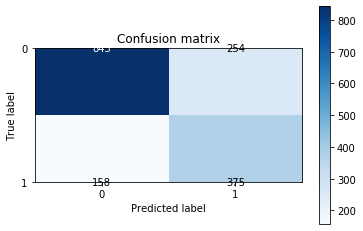

In [117]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


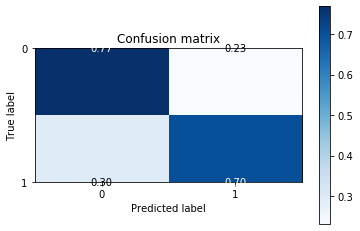

In [118]:
cm = confusion_matrix(predict_test, y_test)
plot_confusion_matrix(cm,[0,1],True)

### Accuracy

In [119]:
clf.score(X_test, y_test)

0.747239263803681

### Precision

In [120]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7035647279549718

### Recall

In [121]:
recall_score(y_test,y_pred)

0.5961844197138315

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80      1097
         1.0       0.60      0.70      0.65       533

    accuracy                           0.75      1630
   macro avg       0.72      0.74      0.72      1630
weighted avg       0.76      0.75      0.75      1630



In [55]:
clf.feature_importances_

array([0.00230226, 0.02249764, 0.01241835, 0.01365824, 0.01126358,
       0.10644036, 0.02990466, 0.01181463, 0.03989921, 0.72136798,
       0.00365824, 0.00415887, 0.00086686, 0.01213229, 0.0062518 ,
       0.00136504])

Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

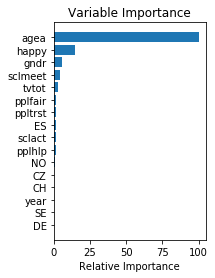

In [56]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, but there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

You can learn more about the parameters for the gradient boost model [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and update the **params** table featured earlier, before we initialized and fit the model.

A few parameters to tune could be:
 - learning_rate
 - max_depth
 - n_estimators
 - loss
 - subsample
 - min_samples_split
 
You can then use the same metrics to evaluate your results.
          
Have fun!

## My Attempt

Data Exploration

In [57]:
df.head()


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [58]:
df.describe(include = 'all')

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8147,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,NaN,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,NaN,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,NaN,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,NaN,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,NaN,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000


In [59]:
df.isna().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

<Figure size 1080x1080 with 0 Axes>

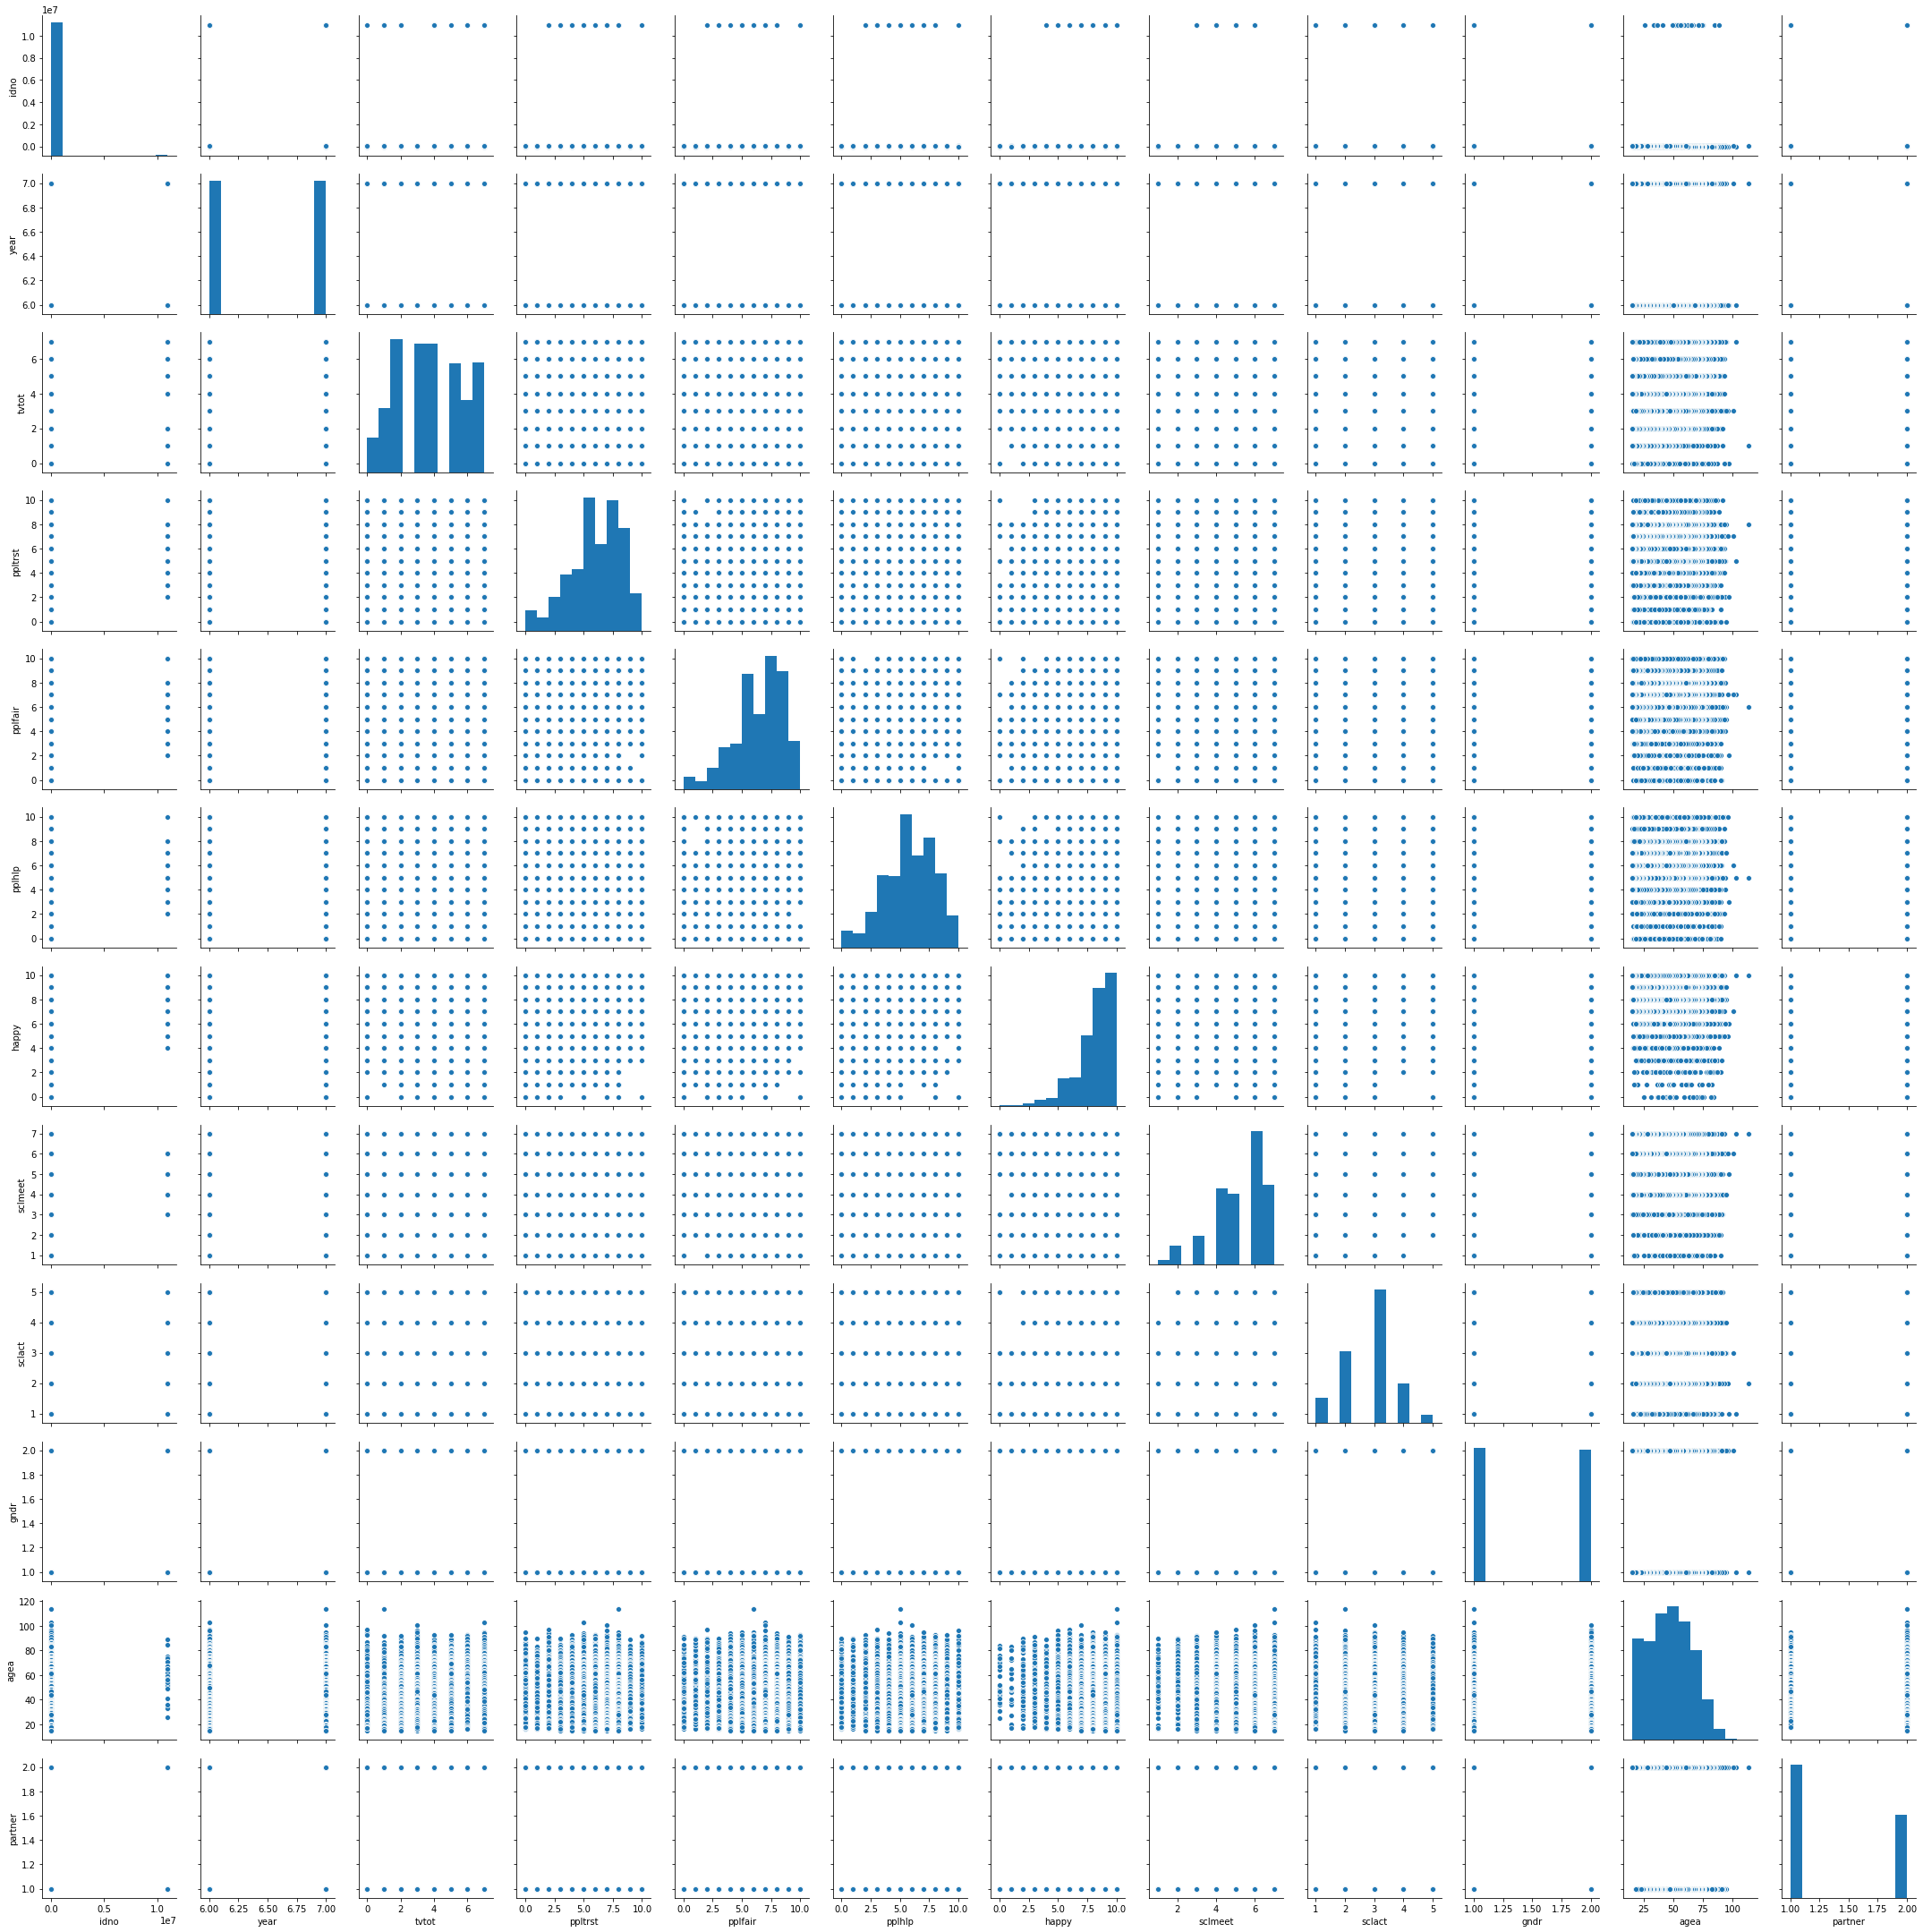

In [60]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.show()

In [61]:
df["partner"] = df['partner'] - 1

In [62]:
df.year.unique()

array([6, 7])

In [63]:
agegroup = pd.cut(df.agea, bins=[0,30,50,150], labels = ['young','middle aged','old'])
agegroup2 = pd.get_dummies(agegroup,drop_first=True)

df2 = pd.concat([df,agegroup2],axis=1)

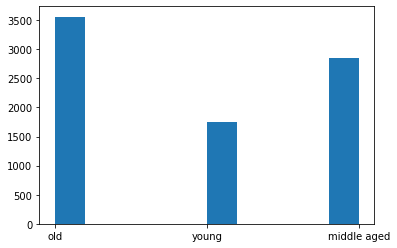

In [64]:
plt.hist(agegroup);

In [134]:
from scipy.stats import pearsonr
print(pearsonr(df2.partner,df2['old']))
print(pearsonr(df.partner,df.agea))
#binning is not more effective

(-0.1556899501452353, 2.2525328211795715e-45)
(-0.25667004610478517, 1.0049687067703615e-122)


Examining relationships between variables to possibly create interaction term

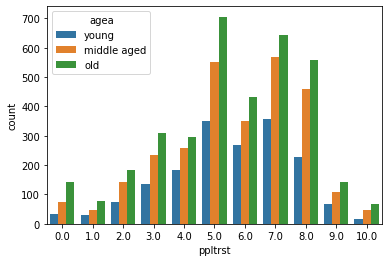

In [65]:
sns.countplot(x=df.ppltrst,hue=agegroup);

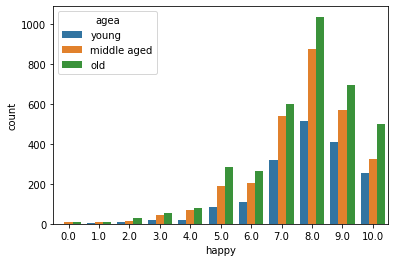

In [66]:
sns.countplot(x=df.happy,hue=agegroup);
#same distribution of age groups for different values of happy and ppltrust

In [77]:
df2.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,middle aged,old
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,0.0,0,1
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,0.0,0,1
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1.0,0,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,0.0,0,1
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,0.0,0,1


Playing with creating a new variables

In [135]:
df2.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

CH switzerland gdp = 80,189.70 USD    
CZ czechoslovakia gdp = 20,368.14 USD    
DE denmark gdp = 56,307.51 USD    
ES spain gdp = 28,156.82 USD    
NO norway gdp = 75,504.57 USD     
SE sweden gdp = 53,442.01 USD


In [138]:
df['gdp level'] = 0 

In [144]:
df.loc[df.cntry == 'CH','gdp level'] = 1
df.loc[df.cntry == 'NO','gdp level'] = 1


In [149]:
pearsonr(df['gdp level'], df['partner'])
#didn't work, thought with higher gdp levels people would marry less because more women are working

(-0.026700343860700432, 0.015950226989451786)

In [85]:
partner = df.partner
people = (df.sclmeet+df.sclact)*df.agea #also tried without multiplying by age, just makes these worse predictors

pearsonr(partner,people)

(-0.18497871743659328, 1.2578565321123438e-63)

In [84]:
pearsonr(partner,df.agea)
#not more effective than age alone

(-0.25667004610478517, 1.0049687067703615e-122)

abandoning looking for more features, moving on to tuning parameters

### Tuning Model

In [150]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': (500,1000),
          'max_depth': (2,4,8),
          'loss': ('deviance','exponential'),
           'learning_rate': (.1,.01,.001),
       'subsample':(.6,.7,.8,.9),
       'min_samples_split':(2,3,4,5)}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier()

gs = RandomizedSearchCV(clf,grid,n_iter=20,cv=5)

gs.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [151]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_max_depth,param_loss,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.198135,3.373958,0.086914,0.005874,0.6,1000,3,8,deviance,0.001,"{'subsample': 0.6, 'n_estimators': 1000, 'min_...",0.755368,0.621933,0.740599,0.751343,0.727552,0.719349,0.049667,5
1,1.990389,0.205694,0.013684,0.010607,0.7,500,3,2,exponential,0.001,"{'subsample': 0.7, 'n_estimators': 500, 'min_s...",0.755368,0.734663,0.711435,0.716807,0.732157,0.730091,0.015419,3
2,26.649951,1.267857,0.113865,0.071786,0.8,1000,4,8,exponential,0.01,"{'subsample': 0.8, 'n_estimators': 1000, 'min_...",0.759969,0.572853,0.727552,0.752878,0.721412,0.706920,0.068622,11
3,5.762257,0.356233,0.028401,0.000950,0.6,1000,5,4,exponential,0.1,"{'subsample': 0.6, 'n_estimators': 1000, 'min_...",0.755368,0.565184,0.695318,0.730622,0.700691,0.689428,0.065805,17
4,2.987689,0.157924,0.014553,0.000416,0.9,500,3,4,exponential,0.1,"{'subsample': 0.9, 'n_estimators': 500, 'min_s...",0.747699,0.524540,0.706830,0.747506,0.706830,0.686666,0.083111,19
5,2.870018,0.084769,0.014066,0.000101,0.7,500,3,4,deviance,0.01,"{'subsample': 0.7, 'n_estimators': 500, 'min_s...",0.764571,0.557515,0.745971,0.750576,0.741366,0.711984,0.077646,9
6,2.796497,0.249474,0.014771,0.000585,0.9,1000,5,2,exponential,0.01,"{'subsample': 0.9, 'n_estimators': 1000, 'min_...",0.763037,0.670245,0.748273,0.752111,0.739831,0.734694,0.033085,2
7,5.955955,0.423350,0.026546,0.001064,0.6,1000,5,4,deviance,0.01,"{'subsample': 0.6, 'n_estimators': 1000, 'min_...",0.762270,0.529908,0.745203,0.755180,0.738296,0.706153,0.088530,12
8,1.645549,0.188855,0.008689,0.000330,0.7,500,4,2,exponential,0.01,"{'subsample': 0.7, 'n_estimators': 500, 'min_s...",0.773006,0.713190,0.748273,0.745971,0.733691,0.742826,0.019560,1
9,17.969488,1.179485,0.065617,0.011058,0.8,1000,4,8,exponential,0.1,"{'subsample': 0.8, 'n_estimators': 1000, 'min_...",0.751534,0.574387,0.708365,0.732924,0.712203,0.695872,0.062706,16


In [152]:
predict_train = gs.predict(X_train)
predict_test = gs.predict(X_test)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(predict_test,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81      1255
         1.0       0.46      0.77      0.58       375

    accuracy                           0.74      1630
   macro avg       0.69      0.75      0.69      1630
weighted avg       0.81      0.74      0.76      1630



Compared with the classification report in the thinkful section, this model has a higher weighted avg precision. The main issue remaining is that there is class imbalance in the dataset.

